# Setup

In [5]:
!git clone https://github.com/lyuwenyu/RT-DETR.git

Cloning into 'RT-DETR'...
remote: Enumerating objects: 695, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 695 (delta 95), reused 86 (delta 82), pack-reused 559
Receiving objects: 100% (695/695), 487.34 KiB | 6.50 MiB/s, done.
Resolving deltas: 100% (330/330), done.


In [1]:
%cd RT-DETR/

/Users/johannes/Code/YOLO/RT-DETR/RT-DETR


/Users/johannes/.pyenv/versions/3.11.7/envs/rtdetr/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
%cd rtdetr_pytorch/

/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch


In [3]:
%ls

README.md          best.onnx          output/            tools/
SmartBasket-3/     configs/           requirements.txt
SmartBasket-3-alt/ fullblackdata/     src/


In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 6.1 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for onnxruntime==1.15.1 from https://files.pythonhosted.org/packages/17/2f/83f6ef69403624e74bc068f8674af34d3af44314a808adac267b2e379171/onnxruntime-1.15.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/0c/fe/fd252ca45e6f9351390059cc2964fc89cc3137895c4711ae8975aa6e098f/pycocotools-2.0.7-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Using cached pycocotools-2.0.7-cp311-cp311-macosx_10_9_universal2.whl.metadata (1.1 kB)
  Obtaining dependency information for PyYAML from https://files.pythonhosted.org/packages/28/09/55f715ddbf95a054b764b547f617e22f1d5e45d83905660e9a088078fe67/PyYAML-6.0.1-cp311-cp31

# Download Dataset

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LJUCaZNr0dTRM9oEmTsC")
project = rf.workspace("leon-spiess").project("smartbasket")
dataset = project.version(3).download("coco")

  Obtaining dependency information for roboflow from https://files.pythonhosted.org/packages/d7/99/066f75774ab3ec03a9bf50efdf758f86b72fc8ca593feb0b3f7bcde35a75/roboflow-1.1.18-py3-none-any.whl.metadata
  Obtaining dependency information for certifi==2023.7.22 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
  Using cached certifi-2023.7.22-py3-none-any.whl.metadata (2.2 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached idna-2.10-py2.py3-none-any.whl (58 kB)
  Obtaining dependency information for opencv-python-headless==4.8.0.74 from https://files.pythonhosted.org/packages/9d/df/88bc1f767d880d4629d71d6d3907bf89aea4506b828e9ede7d3846a0912d/opencv_python_headless-4.8.0.74-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python_headless-4.8.0.74-cp37-abi3-macosx_11_0_arm64.whl.metadata


Extracting Dataset Version Zip to SmartBasket-3 in coco:: 100%|██████████| 208/208 [00:00<00:00, 7971.56it/s]


# Training

In [1]:
%ls

RT-DETR/                               inference_output-2-rv50-ep04-conf-0.5/
_rt-detr-lifecycle.ipynb               inference_output-2-rv50-ep08-conf-0.5/
coco_detection.yml                     inference_output-2-rv50-ep19-conf-0.5/
inference_output-1-conf-0.5-rv50-ep30/ inference_output-2-rv50-ep28-conf-0.5/
inference_output-1-conf-0.5-rv50-ep36/ inference_output-conf-0.5-rv18/
inference_output-1-conf-0.5-rv50-ep55/ inference_output-old/
inference_output-1-conf-0.5-rv50-ep62/ inference_output_example/
inference_output-2-rv50-ep00-conf-0.5/


In [2]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [9]:
!export CUDA_VISIBLE_DEVICES=0

In [10]:
# example usage
!torchrun --master_port=8844 --nproc_per_node=2 tools/train.py -c configs/rtdetr/rtdetr_r18vd_6x_coco.yml -t https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r18vd_5x_coco_objects365_from_paddle.pth

*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
Initialized distributed mode...
Not init distributed mode.
Start trainingStart training

Downloading: "https://github.com/lyuwenyu/storage/releases/download/v0.1/ResNet18_vd_pretrained_from_paddle.pth" to /root/.cache/torch/hub/checkpoints/ResNet18_vd_pretrained_from_paddle.pth
Downloading: "https://github.com/lyuwenyu/storage/releases/download/v0.1/ResNet18_vd_pretrained_from_paddle.pth" to /root/.cache/torch/hub/checkpoints/ResNet18_vd_pretrained_from_paddle.pth
100% 42.8M/42.8M [00:00<00:00, 69.7MB/s]
100% 42.8M/42.8M [00:00<00:00, 69.3MB/s]
Load PResNet18 state_dict
Load PResNet18 state_dict
Traceback (most recent call last):
  File "/content/RT-DETR/rtdetr_pytorch/tools/train.py", line 48, in

In [3]:
%cd RT-DETR/rtdetr_pytorch

/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch


/Users/johannes/.pyenv/versions/3.11.7/envs/rtdetr/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
%ls

NanoStore_Small_COCO/   old_best.onnx           rv50-2-ep04.onnx
README.md               output/                 rv50-2-ep08.onnx
SmartBasket-3/          requirements.txt        rv50-2-ep19.onnx
SmartBasket-3-alt/      rv50-1-ep30.onnx        rv50-2-ep28.onnx
configs/                rv50-1-ep36.onnx        src/
fullblackdata/          rv50-1-ep55.onnx        tools/
fullblackdata_old/      rv50-1-ep62.onnx        train_01_epoch_30.onnx
logs/                   rv50-2-ep00.onnx        train_01_epoch_65.onnx


In [62]:
# updated r50v (Trained on Objects365 and finetuned on COCO)
!python tools/train.py -c /Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml -t https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r50vd_2x_coco_objects365_from_paddle.pth

Not init distributed mode.
Start training
Load PResNet50 state_dict
Tuning checkpoint from https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r50vd_2x_coco_objects365_from_paddle.pth
Downloading: "https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r50vd_2x_coco_objects365_from_paddle.pth" to /Users/johannes/.cache/torch/hub/checkpoints/rtdetr_r50vd_2x_coco_objects365_from_paddle.pth
100%|████████████████████████████████████████| 164M/164M [00:15<00:00, 11.2MB/s]
Load model.state_dict, {'missed': [], 'unmatched': ['decoder.denoising_class_embed.weight', 'decoder.enc_score_head.weight', 'decoder.enc_score_head.bias', 'decoder.dec_score_head.0.weight', 'decoder.dec_score_head.0.bias', 'decoder.dec_score_head.1.weight', 'decoder.dec_score_head.1.bias', 'decoder.dec_score_head.2.weight', 'decoder.dec_score_head.2.bias', 'decoder.dec_score_head.3.weight', 'decoder.dec_score_head.3.bias', 'decoder.dec_score_head.4.weight', 'decoder.dec_score_head.4.bias', 'decode

In [42]:
# training on single-gpu
# configs/rtdetr/rtdetr_r18vd_6x_coco.yml
# configs/rtdetr/rtdetr_r50vd_6x_coco.yml
# !python tools/train.py -c configs/rtdetr/rtdetr_r18vd_6x_coco.yml -t https://github.com/lyuwenyu/storage/releases/download/v0.1/rtdetr_r18vd_5x_coco_objects365_from_paddle.pth
# /Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r101vd_6x_coco.yml
!python tools/train.py -c /Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml # --batch-size '16' --epochs '100' --device 'cpu'

Not init distributed mode.
Start training
Downloading: "https://github.com/lyuwenyu/storage/releases/download/v0.1/ResNet50_vd_ssld_v2_pretrained_from_paddle.pth" to /Users/johannes/.cache/torch/hub/checkpoints/ResNet50_vd_ssld_v2_pretrained_from_paddle.pth
100%|██████████████████████████████████████| 90.0M/90.0M [00:09<00:00, 10.2MB/s]
Load PResNet50 state_dict
Initial lr:  [1e-05, 0.0001, 0.0001, 0.0001]
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
number of params: 42702570
Epoch: [0]  [ 0/78]  eta: 0:12:48  lr: 0.000010  loss: 43.2548 (43.2548)  loss_vfl: 0.2678 (0.2678)  loss_bbox: 1.4867 (1.4867)  loss_giou: 1.6289 (1.6289)  loss_vfl_aux_0: 0.2284 (0.2284)  loss_bbox_aux_0: 1.5237 (1.5237)  loss_giou_aux_0: 1.6574 (1.6574)  loss_vfl_aux_1: 0.2458 (0.2458)  loss_bbox_aux_1: 1.3950 (1.3950)  loss_giou_aux_1: 1.7294 (1.7294)  loss_vfl_aux_2: 0.2603 (0.2603)  loss_

# Export model to onnx

In [8]:
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r18vd_6x_coco/checkpoint0030.pth' # rv18-1
# model_config = 'configs/rtdetr/rtdetr_r18vd_6x_coco.yml' # rv18-1
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r50vd_6x_coco_1550min/checkpoint0055.pth' # rv50-1
model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r50vd_6x_coco-2/checkpoint0028.pth' # rv50-2
model_config = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/configs/rtdetr/rtdetr_r50vd_6x_coco.yml'
!python tools/export_onnx.py -c {model_config} -r {model_checkpoint} --check

Load PResNet50 state_dict
True
/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/tools/../src/zoo/rtdetr/rtdetr_decoder.py:122: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if reference_points.shape[-1] == 2:
/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/tools/../src/zoo/rtdetr/rtdetr_decoder.py:129: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  elif reference_points.shape[-1] == 4:
================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 

# Model Inference

In [2]:
import onnxruntime as ort 
from PIL import Image, ImageDraw
from torchvision.transforms import ToTensor
import torch
import matplotlib.pyplot as plt
import numpy as np

In [3]:
label_dict = {"id":0,"name":"person","supercategory":"none"},{"id":1,"name":"trolley","supercategory":"grocery"}

# Inference on an entire Folder

In [4]:
import os
import onnxruntime as ort
from PIL import Image, ImageDraw
from torchvision.transforms import ToTensor
import torch
import matplotlib.pyplot as plt
import numpy as np
import re

In [5]:
label_dict = {"id":0,"name":"person","supercategory":"none"},{"id":1,"name":"trolley","supercategory":"grocery"}
# label_dict = {"id":0,"name":"grocery","supercategory":"none"},{"id":1,"name":"cola","supercategory":"grocery"},{"id":2,"name":"kokosnussmilch","supercategory":"grocery"},{"id":3,"name":"nutella","supercategory":"grocery"},{"id":4,"name":"pizza_mozzarella","supercategory":"grocery"},{"id":5,"name":"pizza_thunfisch","supercategory":"grocery"},{"id":6,"name":"zahnpasta","supercategory":"grocery"},{"id":7,"name":"zucker","supercategory":"grocery"}

In [6]:
def inference(source, output_folder, model_checkpoint, thrh=0.35, img_size=[640, 640], plot=False):
    if isinstance(source, str):
        # single image
        if re.match(r".*\.(png|jpeg|jpg)$", source):
            inference_image(source, output_folder, model_checkpoint, thrh, img_size, plot)
        # single folder
        else:
            inference_folder(source, output_folder, model_checkpoint, thrh, img_size, plot)
    elif isinstance(source, list):
        # list of folders or images or both
        for path in source:
            # single image
            if re.match(r".*\.(png|jpeg|jpg)$", path):
                inference_image(path, output_folder, model_checkpoint, thrh, img_size, plot)
            else:
                # single folder
                inference_folder(source, output_folder, model_checkpoint, thrh, img_size, plot)
    else:
        raise TypeError("Invalid source type. Expected folder-/imagepath or list of folder-/imagepaths.")


def inference_folder(input_folder, output_folder, model_checkpoint, thrh = 0.35, img_size=[640, 640], plot=False):
    os.makedirs(output_folder, exist_ok=True)
    img_paths = [os.path.join(input_folder, filename) for filename in os.listdir(input_folder) if filename.endswith(('.png', '.jpg', '.jpeg'))]
    size = torch.tensor([img_size])

    img_counter = 1
    for path in img_paths:
        inference_image(path, output_folder, model_checkpoint, thrh, img_size, plot)
        print(f"Inference Progress {img_counter}/{len(img_paths)} - {np.round(img_counter/len(img_paths), 2) * 100}%")
        img_counter += 1


def inference_image(img_path, output_folder, model_checkpoint, thrh = 0.35, img_size=[640, 640], plot=False):
    os.makedirs(output_folder, exist_ok=True)
    size = torch.tensor([img_size])
    im = Image.open(img_path).convert('RGB')
    im = im.resize((img_size[0], img_size[1]))
    im_data = ToTensor()(im)[None]

    sess = ort.InferenceSession(model_checkpoint) # args.file_name
    output = sess.run(
        # output_names=['labels', 'boxes', 'scores'],
        output_names=None,
        input_feed={'images': im_data.data.numpy(), "orig_target_sizes": size.data.numpy()}
    )
    labels, boxes, scores = output
    draw = ImageDraw.Draw(im)

    for i in range(im_data.shape[0]):
        scr = scores[i]
        lab = labels[i][scr > thrh]
        box = boxes[i][scr > thrh]
        # print(scr, sum(scr > thrh))
        counter = 0
        for b in box:
            # print(scr[counter])
            draw.rectangle(list(b), outline='red',)
            draw.text((b[0], b[1]), text=str(label_dict[lab[counter]]['name']), fill=(127, 0, 255), )
            draw.text((b[0], b[1]+10), text=str(np.round(scr[counter], 4)), fill=(127, 0, 255), )
            counter += 1

    if plot:
        plt.imshow(im)
        plt.show()
    print(f"Inference on image finished, saved in: {os.path.join(output_folder, os.path.basename(img_path))}")
    im.save(os.path.join(output_folder, os.path.basename(img_path)))

In [7]:
# more image paths (in-sample + out-of-sample)
img_paths = ['/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/5c842df3-172_0_5.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/e479f98b-173_0_152.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/c8cd7af9-176_0_84.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/6498dca8-173_0_135.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/0a717d38-176_1_38.png']

img_paths_ = ['/Users/johannes/Code/YOLO/YOLOv6-v3.0/trolley-2/images/test/000007_jpg.rf.5d592241e6f2ddc96d01c6e94bc5bbac.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/trolley-2/images/valid/000023_jpg.rf.c3cb09baafc35cb580db1a930ad7ac44.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/trolley-2/images/valid/000001_jpg.rf.86f812f34056c12742817f2bf6667de5.jpg',
            '/Users/johannes/Code/labelstudio/yolov8_full_data_/images/0a3df008-173_0_115.png',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/IMG_20230816_122154_1_jpg.rf.1f22203898ba48a3445df8259701f790.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/IMG_20230816_122143_1_jpg.rf.4c7d33994df8a930a034db866b556d95.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/6_frame0_jpg.rf.0ea32c84b691144e3fc5b8e9e457d82e.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/5_frame90_jpg.rf.30fd2bf37cbe60477eacf7672693badb.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/3_frame0_jpg.rf.fe9dd8c4bea3cab47ada462456eca912.jpg']

In [8]:
img_path = "/Users/johannes/Code/Work/Data_cleaned/jacket_176_1/176_1_29.png"
input_folder = "/Users/johannes/Code/Work/Test_Data"
# input_folder = "/Users/johannes/Code/Work/Exports/Random_Test"
# input_folder = '/Users/johannes/Code/Work/Exports/Out-of-sample-Test'
output_folder = "/Users/johannes/Code/YOLO/RT-DETR/inference_output"
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/model.onnx'
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/train_01_epoch_30.onnx' # rv18
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/rv50-1-ep55.onnx' # rv50-ep55-1
model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/rv50-2-ep19.onnx' # rv50-2

inference(input_folder, output_folder, model_checkpoint, thrh=0.5, img_size=[640, 640], plot=False)

Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/173_0_4.png
Inference Progress 1/84 - 1.0%
Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/173_0_17950.png
Inference Progress 2/84 - 2.0%
Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/173_0_909886.png
Inference Progress 3/84 - 4.0%
Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/173_0_5.png
Inference Progress 4/84 - 5.0%
Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/Test_Data173_0_9.png
Inference Progress 5/84 - 6.0%
Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/Test_Data173_0_18.png
Inference Progress 6/84 - 7.000000000000001%
Inference on image finished, saved in: /Users/johannes/Code/YOLO/RT-DETR/inference_output/173_0_7.png
Inference Progress 7/84 - 8.0%
Inference on image finished

### If any errors occur, check which image size the model is expecting

In [39]:
import onnx

# Load the ONNX model
onnx_model = onnx.load(model_checkpoint)

# Print the input shape
input_shape = onnx_model.graph.input[0].type.tensor_type.shape.dim
print("Expected Input Shape:", [dim.dim_value for dim in input_shape])

Input Shape: [0, 3, 640, 640]


# Out-of-Sample-Error

0.3535753


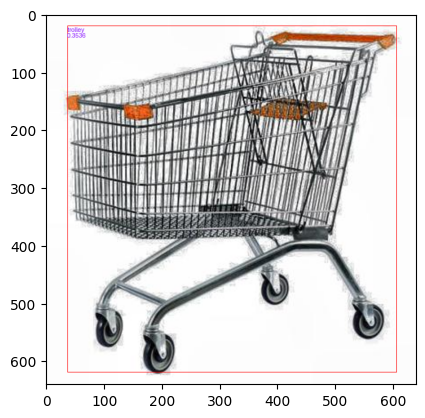

0.9141437
0.8873869
0.8852601
0.44477472


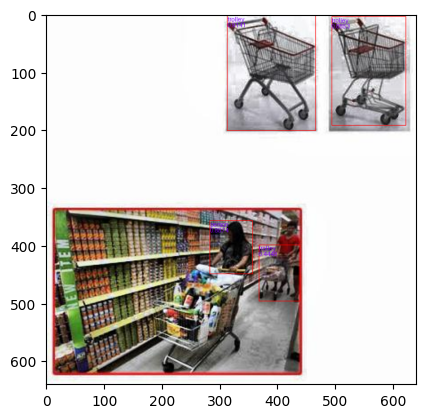

0.8808413
0.72589815


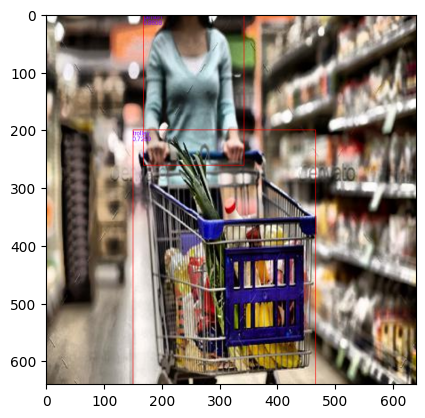

0.9490382
0.9390162


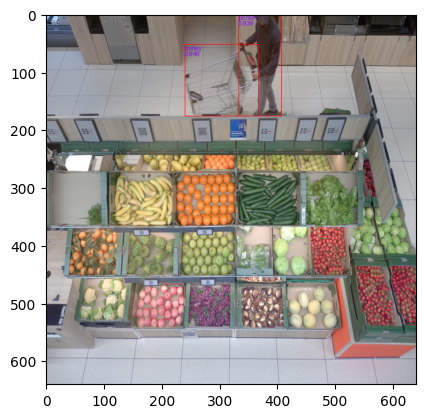

0.91367996
0.5774969


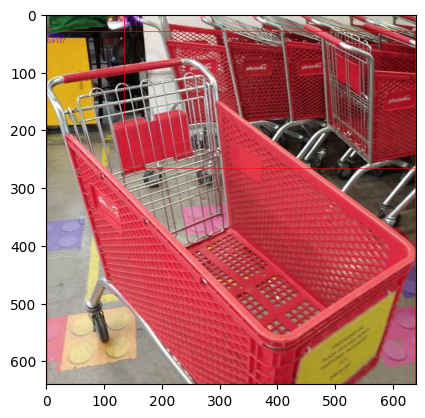

0.8992741


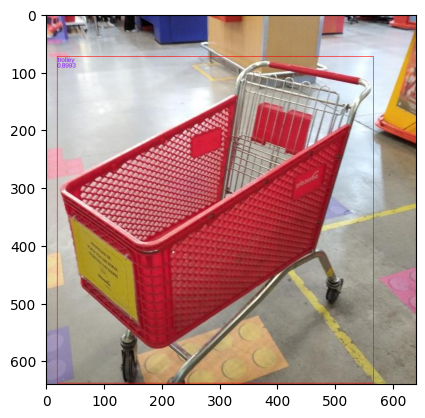

0.9136659


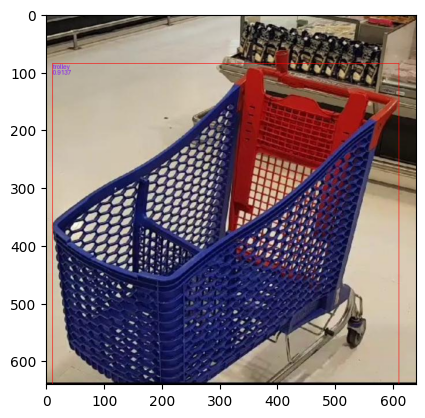

0.8062461


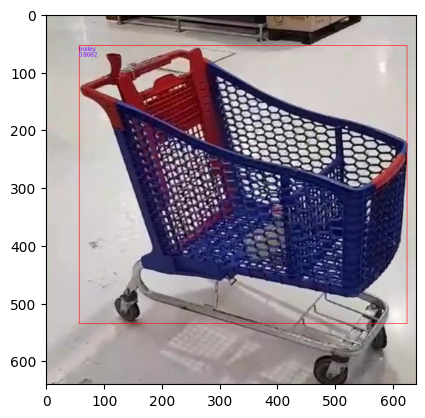

0.72273755
0.6544769


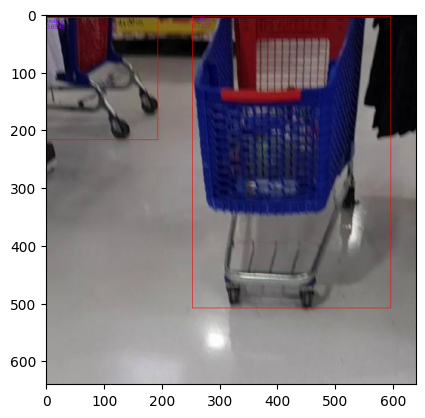

In [12]:
# print(onnx.helper.printable_graph(mm.graph))

img_paths = ['/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/5c842df3-172_0_5.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/e479f98b-173_0_152.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/c8cd7af9-176_0_84.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/6498dca8-173_0_135.png',
            '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/fullblackdata/images/0a717d38-176_1_38.png']

img_paths_ = ['/Users/johannes/Code/YOLO/YOLOv6-v3.0/trolley-2/images/test/000007_jpg.rf.5d592241e6f2ddc96d01c6e94bc5bbac.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/trolley-2/images/valid/000023_jpg.rf.c3cb09baafc35cb580db1a930ad7ac44.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/trolley-2/images/valid/000001_jpg.rf.86f812f34056c12742817f2bf6667de5.jpg',
            '/Users/johannes/Code/labelstudio/yolov8_full_data_/images/0a3df008-173_0_115.png',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/IMG_20230816_122154_1_jpg.rf.1f22203898ba48a3445df8259701f790.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/IMG_20230816_122143_1_jpg.rf.4c7d33994df8a930a034db866b556d95.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/6_frame0_jpg.rf.0ea32c84b691144e3fc5b8e9e457d82e.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/5_frame90_jpg.rf.30fd2bf37cbe60477eacf7672693badb.jpg',
            '/Users/johannes/Code/YOLO/YOLOv6-v3.0/YOLOv6/Carritos-2/images/train/3_frame0_jpg.rf.fe9dd8c4bea3cab47ada462456eca912.jpg']

visualize = True
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/model.onnx' # '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/best.onnx'
# model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/train_01_epoch_30.onnx' # rv18
model_checkpoint = '/Users/johannes/Code/YOLO/RT-DETR/RT-DETR/rtdetr_pytorch/output/rtdetr_r50vd_6x_coco_1550min/checkpoint0063.pth' # rv50-1
size = torch.tensor([[640, 640]])
# size = torch.tensor([[800, 600]])

for path in img_paths_:
    im = Image.open(path).convert('RGB')
    im = im.resize((640, 640))
    # im = im.resize((800, 600))
    im_data = ToTensor()(im)[None]
    # print(im_data.shape)

    sess = ort.InferenceSession(model_checkpoint) # args.file_name
    output = sess.run(
        # output_names=['labels', 'boxes', 'scores'],
        output_names=None,
        input_feed={'images': im_data.data.numpy(), "orig_target_sizes": size.data.numpy()}
    )

    # print(type(output))
    # print([out.shape for out in output])

    labels, boxes, scores = output
    draw = ImageDraw.Draw(im)
    thrh = 0.35 # 0.8

    for i in range(im_data.shape[0]):

        scr = scores[i]
        lab = labels[i][scr > thrh]
        box = boxes[i][scr > thrh]

        # print(scr, sum(scr > thrh))

        counter = 0
        for b in box:
            print(scr[counter])
            draw.rectangle(list(b), outline='red',)
            if visualize:
                draw.text((b[0], b[1]), text=str(label_dict[lab[counter]]['name']), fill=(127, 0, 255), )
                draw.text((b[0], b[1]+10), text=str(np.round(scr[counter], 4)), fill=(127, 0, 255), )
            counter += 1

    plt.imshow(im)
    plt.show()
    # im.save('test.jpg')